In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from operator import attrgetter
import matplotlib.colors as mcolors

In [2]:
rocket_fuel=pd.read_csv('test.csv')
display(rocket_fuel.head(5))
display(rocket_fuel.info())
display(rocket_fuel.isnull().sum())
#checking duplicates in dataframe
print('duplicate rows:',rocket_fuel.duplicated().sum())

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour,control_group
0,1069124,1,0,130,1,20,0
1,1119715,1,0,93,2,22,0
2,1144181,1,0,21,2,18,0
3,1435133,1,0,355,2,10,0
4,1015700,1,0,276,5,14,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         588101 non-null  int64
 1   test            588101 non-null  int64
 2   converted       588101 non-null  int64
 3   tot_impr        588101 non-null  int64
 4   mode_impr_day   588101 non-null  int64
 5   mode_impr_hour  588101 non-null  int64
 6   control_group   588101 non-null  int64
dtypes: int64(7)
memory usage: 31.4 MB


None

user_id           0
test              0
converted         0
tot_impr          0
mode_impr_day     0
mode_impr_hour    0
control_group     0
dtype: int64

duplicate rows: 0


In [3]:

total_user_treated_group = rocket_fuel['test'].sum()
print('total_user_treated_group:',total_user_treated_group)

total_user_treated_group: 564577


In [4]:
total_user_control_group = rocket_fuel['control_group'].sum()
print('total_user_control_group_group:',total_user_control_group)

total_user_control_group_group: 23524


In [5]:
converted_user_treated_group=(rocket_fuel['test']*rocket_fuel['converted']).sum()
print('converted_user_treated_group:',converted_user_treated_group)

converted_user_treated_group: 14423


In [6]:
converted_user_control_group=(rocket_fuel['control_group']*rocket_fuel['converted']).sum()
print('converted_user_control_group:',converted_user_control_group)

converted_user_control_group: 420


In [7]:
conversion_rate_treated_group = converted_user_treated_group/total_user_treated_group
print('conversion_rate_treated_group:',conversion_rate_treated_group)


conversion_rate_treated_group: 0.025546559636683747


In [8]:
conversion_rate_control_group = converted_user_control_group/total_user_control_group
print('conversion_rate_control_group:',conversion_rate_control_group)

conversion_rate_control_group: 0.01785410644448223


In [9]:
diff_conversion_rate = conversion_rate_treated_group - conversion_rate_control_group
print('diff_conversion_rate:',diff_conversion_rate)


diff_conversion_rate: 0.007692453192201517


In [10]:
value_of_a_converted_user=40
return_of_the_campaign = value_of_a_converted_user*total_user_treated_group*diff_conversion_rate
print('return_of_the_campaign:',return_of_the_campaign)

return_of_the_campaign: 173719.28583574222


In [11]:
total_number_of_impression=rocket_fuel['tot_impr'].sum()
print('total_number_of_impression:',total_number_of_impression)

total_number_of_impression: 14597182


In [12]:
cost_per_thosands_impression=9
cost_of_the_ad_campaign=(total_number_of_impression)/(1000*cost_per_thosands_impression)
print('cost_of_the_ad_campaign:',cost_of_the_ad_campaign)

cost_of_the_ad_campaign: 1621.909111111111


In [13]:
ROI_of_the_campaign=(return_of_the_campaign - cost_of_the_ad_campaign)/cost_of_the_ad_campaign
print('ROI_of_the_campaign:',ROI_of_the_campaign)

ROI_of_the_campaign: 106.10790428739466


In [14]:
return_of_the_treated_group= return_of_the_campaign
print('return_of_the_treated_group:',return_of_the_treated_group)


return_of_the_treated_group: 173719.28583574222


In [15]:
number_of_impression_in_the_treated_group=((rocket_fuel['tot_impr'])*(rocket_fuel['test'])).sum()
print('number_of_impression_in_the_treated_group:',number_of_impression_in_the_treated_group)

number_of_impression_in_the_treated_group: 14014701


In [16]:
cost_of_treated_group=number_of_impression_in_the_treated_group/(1000*cost_per_thosands_impression)
print('cost_of_treated_group:',cost_of_treated_group)

cost_of_treated_group: 1557.189


In [17]:
ROI_of_the_treated_group=(return_of_the_treated_group-cost_of_treated_group)/(cost_of_treated_group)
print('ROI_of_the_treated_group:',ROI_of_the_treated_group)

ROI_of_the_treated_group: 110.55953826782888


In [18]:
cost_of_the_control_group=(((rocket_fuel['tot_impr'])*(rocket_fuel['control_group'])).sum())/(1000*cost_per_thosands_impression)
print('cost_of_the_control_group:',cost_of_the_control_group)                      
                    

cost_of_the_control_group: 64.72011111111111


In [19]:
return_of_the_control_group=value_of_a_converted_user*total_user_control_group*diff_conversion_rate
print('return_of_the_control_group:',return_of_the_control_group)    

return_of_the_control_group: 7238.2907557339395


In [20]:
ROI_of_the_control_group=(return_of_the_control_group-cost_of_the_control_group)/cost_of_the_control_group
print('ROI_of_the_control_group:',ROI_of_the_control_group)

ROI_of_the_control_group: 110.83990001666228


In [21]:
#converted consumers in weekdays

rocket_fuel['number_of_converted_in_the_treated_group']=((rocket_fuel['converted'])*(rocket_fuel['test']))
rocket_fuel_treat_group_day_converted=rocket_fuel.groupby("mode_impr_day").agg({'number_of_converted_in_the_treated_group': 'sum'})
display(rocket_fuel_treat_group_day_converted.head())

rocket_fuel['number_of_converted_in_the_control_group']=((rocket_fuel['converted'])*(rocket_fuel['control_group']))
rocket_fuel_control_group_day_converted=rocket_fuel.groupby("mode_impr_day").agg({'number_of_converted_in_the_control_group': 'sum'})
display(rocket_fuel_control_group_day_converted.head())


,number_of_converted_in_the_treated_group
mode_impr_day,
1,2778
2,2270
3,1963
4,1711
5,1995


,number_of_converted_in_the_control_group
mode_impr_day,
1,79
2,42
3,55
4,79
5,62


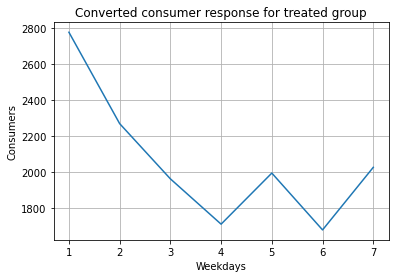

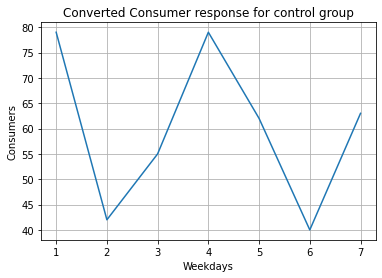

In [22]:
plt.figure(figsize=[6,4])
plt.grid(True)
plt.plot(rocket_fuel_treat_group_day_converted['number_of_converted_in_the_treated_group'],label='Active users')
plt.title('Converted consumer response for treated group')
plt.xlabel("Weekdays")
plt.ylabel("Consumers")
plt.show()
#----------------------------------------------------

plt.figure(figsize=[6,4])
plt.grid(True)
plt.plot(rocket_fuel_control_group_day_converted['number_of_converted_in_the_control_group'],label='Active users')
plt.title('Converted Consumer response for control group')
plt.xlabel("Weekdays")
plt.ylabel("Consumers")
plt.show()

In [23]:

rocket_fuel['number_of_impression_in_the_treated_group']=((rocket_fuel['tot_impr'])*(rocket_fuel['test']))
rocket_fuel['number_of_impression_in_the_control_group']=((rocket_fuel['tot_impr'])*(rocket_fuel['control_group']))
rocket_fuel_treat_group_day=rocket_fuel.groupby("mode_impr_day").agg({'number_of_impression_in_the_treated_group': 'sum'})
rocket_fuel_control_group_day=rocket_fuel.groupby("mode_impr_day").agg({'number_of_impression_in_the_control_group': 'sum'})
display(rocket_fuel_treat_group_day)
display(rocket_fuel_control_group_day)

,number_of_impression_in_the_treated_group
mode_impr_day,
1,2121848
2,1792031
3,1904940
4,1839933
5,2369546
6,1980043
7,2006360


,number_of_impression_in_the_control_group
mode_impr_day,
1,83582
2,61690
3,80478
4,104240
5,94950
6,80048
7,77493


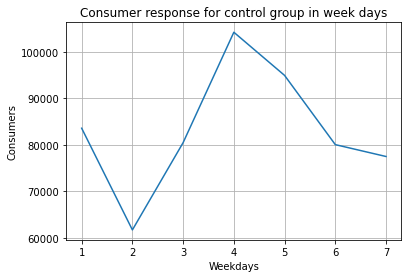

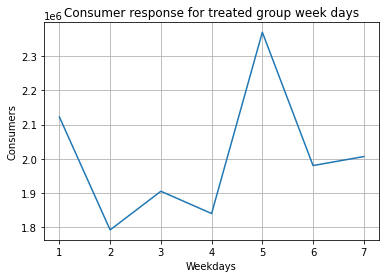

In [24]:
plt.figure(figsize=[6,4])
plt.grid(True)
plt.plot(rocket_fuel_control_group_day['number_of_impression_in_the_control_group'],label='Active users')
plt.title('Consumer response for control group in week days')
plt.xlabel("Weekdays")
plt.ylabel("Consumers")
plt.show()
#----------------------------------------------------

plt.figure(figsize=[6,4])
plt.grid(True)
plt.plot(rocket_fuel_treat_group_day['number_of_impression_in_the_treated_group'],label='Active users')
plt.title('Consumer response for treated group week days')
plt.xlabel("Weekdays")
plt.ylabel("Consumers")
plt.show()

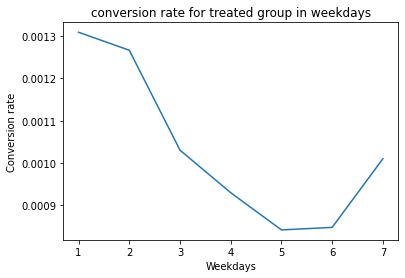

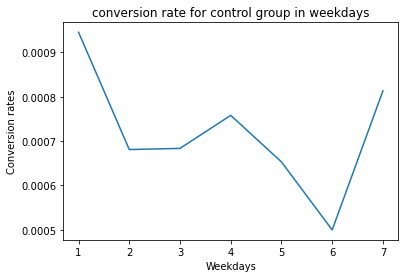

In [25]:
#convertion rate for treated group

treat_conversion= rocket_fuel_treat_group_day_converted['number_of_converted_in_the_treated_group'] / rocket_fuel_treat_group_day['number_of_impression_in_the_treated_group']
plt.plot(treat_conversion,label='Active users')
plt.title('conversion rate for treated group in weekdays')
plt.xlabel("Weekdays")
plt.ylabel("Conversion rate")
plt.show()

#convertion rate for control group

control_conversion= rocket_fuel_control_group_day_converted['number_of_converted_in_the_control_group'] / rocket_fuel_control_group_day['number_of_impression_in_the_control_group']
plt.plot(control_conversion,label='Active users')
plt.title('conversion rate for control group in weekdays')
plt.xlabel("Weekdays")
plt.ylabel("Conversion rates")
plt.show()

In [26]:
#without 12-8 hours
filter= rocket_fuel.copy()
filter_rocket=filter.query('mode_impr_hour !=[0,1,2,3,4,5,6,7,8]')
display(filter_rocket.head(5))


filter_rocket['number_of_impression_in_the_treated_group']=((filter_rocket['tot_impr'])*(rocket_fuel['test']))
filter_rocket['number_of_impression_in_the_control_group']=((filter_rocket['tot_impr'])*(rocket_fuel['control_group']))
filter_rocket_treat_group_hour=filter_rocket.groupby("mode_impr_hour").agg({'number_of_impression_in_the_treated_group': 'sum'})
filter_rocket_control_group_hour=filter_rocket.groupby("mode_impr_hour").agg({'number_of_impression_in_the_control_group': 'sum'})
display(filter_rocket_treat_group_hour)
display(filter_rocket_control_group_hour)

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour,control_group,number_of_converted_in_the_treated_group,number_of_converted_in_the_control_group,number_of_impression_in_the_treated_group,number_of_impression_in_the_control_group
0,1069124,1,0,130,1,20,0,0,0,130,0
1,1119715,1,0,93,2,22,0,0,0,93,0
2,1144181,1,0,21,2,18,0,0,0,21,0
3,1435133,1,0,355,2,10,0,0,0,355,0
4,1015700,1,0,276,5,14,0,0,0,276,0


<ipython-input-26-7b4c28d8c395>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_rocket['number_of_impression_in_the_treated_group']=((filter_rocket['tot_impr'])*(rocket_fuel['test']))
<ipython-input-26-7b4c28d8c395>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_rocket['number_of_impression_in_the_control_group']=((filter_rocket['tot_impr'])*(rocket_fuel['control_group']))


,number_of_impression_in_the_treated_group
mode_impr_hour,
9,700615.0
10,944888.0
11,1102657.0
12,1183507.0
13,1164947.0
14,1064130.0
15,1081442.0
16,804324.0
17,817456.0


,number_of_impression_in_the_control_group
mode_impr_hour,
9,27571.0
10,38389.0
11,48089.0
12,51749.0
13,54728.0
14,44456.0
15,51690.0
16,35993.0
17,31031.0


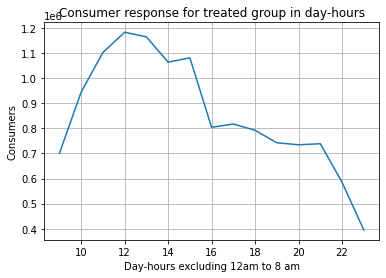

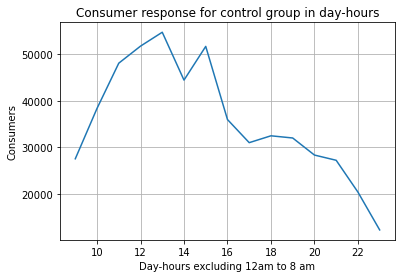

In [27]:
plt.figure(figsize=[6,4])
plt.grid(True)
plt.plot(filter_rocket_treat_group_hour['number_of_impression_in_the_treated_group'],label='Active users')
plt.title('Consumer response for treated group in day-hours')
plt.xlabel("Day-hours excluding 12am to 8 am")
plt.ylabel("Consumers")
plt.show()
#----------------------------------------------------

plt.figure(figsize=[6,4])
plt.grid(True)
plt.plot(filter_rocket_control_group_hour['number_of_impression_in_the_control_group'],label='Active users')
plt.title('Consumer response for control group in day-hours')
plt.xlabel("Day-hours excluding 12am to 8 am")
plt.ylabel("Consumers")
plt.show()

In [28]:
filter_rocket['converted_number_of_impression_in_the_treated_group']=((filter_rocket['converted'])*(rocket_fuel['test']))
filter_rocket['converted_number_of_impression_in_the_control_group']=((filter_rocket['converted'])*(rocket_fuel['control_group']))
filter_rocket_treat_converted_group_hour=filter_rocket.groupby("mode_impr_hour").agg({'converted_number_of_impression_in_the_treated_group': 'sum'})
filter_rocket_control_converted_group_hour=filter_rocket.groupby("mode_impr_hour").agg({'converted_number_of_impression_in_the_control_group': 'sum'})
display(filter_rocket_treat_converted_group_hour)
display(filter_rocket_control_converted_group_hour)

<ipython-input-28-9ffce9e3144d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_rocket['converted_number_of_impression_in_the_treated_group']=((filter_rocket['converted'])*(rocket_fuel['test']))
<ipython-input-28-9ffce9e3144d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_rocket['converted_number_of_impression_in_the_control_group']=((filter_rocket['converted'])*(rocket_fuel['control_group']))


,converted_number_of_impression_in_the_treated_group
mode_impr_hour,
9,582.0
10,818.0
11,992.0
12,1092.0
13,1140.0
14,1251.0
15,1279.0
16,1111.0
17,959.0


,converted_number_of_impression_in_the_control_group
mode_impr_hour,
9,13.0
10,20.0
11,30.0
12,35.0
13,36.0
14,30.0
15,46.0
16,45.0
17,28.0


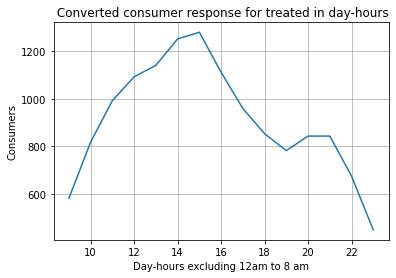

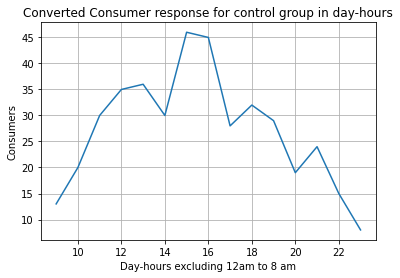

In [29]:
plt.figure(figsize=[6,4])
plt.grid(True)
plt.plot(filter_rocket_treat_converted_group_hour['converted_number_of_impression_in_the_treated_group'],label='Active users')
plt.title(' Converted consumer response for treated in day-hours')
plt.xlabel("Day-hours excluding 12am to 8 am")
plt.ylabel("Consumers")
plt.show()
#----------------------------------------------------

plt.figure(figsize=[6,4])
plt.grid(True)
plt.plot(filter_rocket_control_converted_group_hour['converted_number_of_impression_in_the_control_group'],label='Active users')
plt.title('Converted Consumer response for control group in day-hours')
plt.xlabel("Day-hours excluding 12am to 8 am")
plt.ylabel("Consumers")
plt.show()

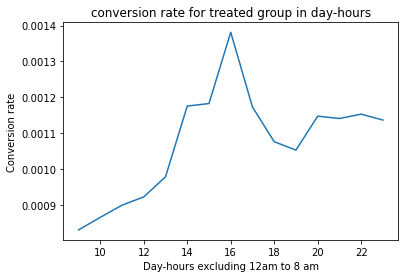

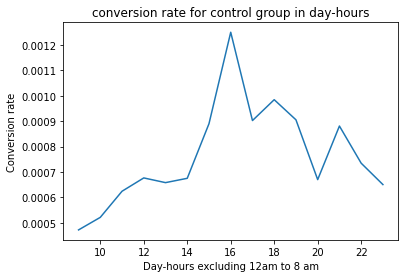

In [30]:
#convertion rate for treated group

treat_conversion_hour= filter_rocket_treat_converted_group_hour['converted_number_of_impression_in_the_treated_group'] / filter_rocket_treat_group_hour['number_of_impression_in_the_treated_group']
plt.plot(treat_conversion_hour,label='Active users')
plt.title('conversion rate for treated group in day-hours')
plt.xlabel("Day-hours excluding 12am to 8 am")
plt.ylabel("Conversion rate")
plt.show()

#convertion rate for control group

control_conversion_hour= filter_rocket_control_converted_group_hour['converted_number_of_impression_in_the_control_group'] / filter_rocket_control_group_hour['number_of_impression_in_the_control_group']
plt.plot(control_conversion_hour,label='Active users')
plt.title('conversion rate for control group in day-hours')
plt.xlabel("Day-hours excluding 12am to 8 am")
plt.ylabel("Conversion rate")
plt.show()

#### Was the ad campaign effective? Did additional consumers convert as a result of the ad campaign?

In [31]:
result=pd.read_csv('result.csv',index_col=False)
display(result)

,user group,total_user_treated_group,total_user_control_group,converted_user_treated_group,converted_user_control_group,conversion_rate_treated_group,conversion_rate_control_group,diff_conversion_rate,return_of_the_campaign,cost_of_the_ad_campaign,ROI_of_the_campaign,return_of_the_treated_group,cost_of_treated_group,ROI_of_the_treated_group,cost_of_the_control_group,return_of_the_control_group,ROI_of_the_control_group
0,user group,564577.0,23524.0,14423.0,420.0,0.0255,0.0179,0.0077,173719.2858,1621.9091,106.1079,173719.2858,126132.309,110.5595,64.7201,7238.2908,110.8399


In [32]:
user_1=result[['total_user_treated_group','total_user_control_group']]
display(user_1)
user_2=result[['converted_user_treated_group','converted_user_control_group']]
display(user_2)

,total_user_treated_group,total_user_control_group
0,564577.0,23524.0


,converted_user_treated_group,converted_user_control_group
0,14423.0,420.0


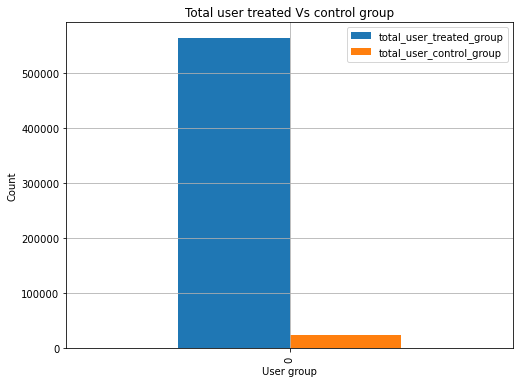

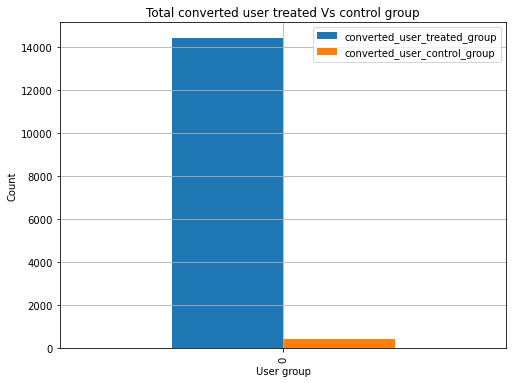

In [33]:
user_1.plot(y=['total_user_treated_group','total_user_control_group'],kind='bar', figsize=(8,6),grid=True)
plt.xlabel("User group")
plt.ylabel("Count")
plt.title('Total user treated Vs control group')
plt.legend()
user_2.plot(y=['converted_user_treated_group','converted_user_control_group'], kind='bar', figsize=(8,6),grid=True)
plt.xlabel("User group")
plt.ylabel("Count")
plt.title('Total converted user treated Vs control group')
plt.legend()

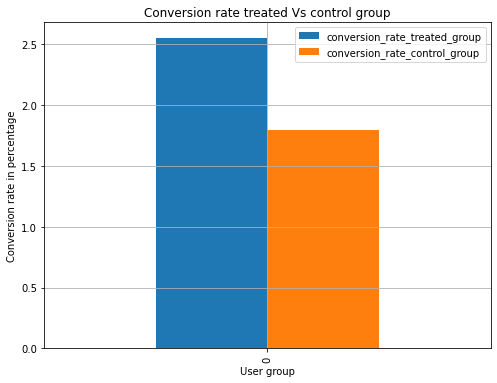

In [34]:
rate=result[['conversion_rate_treated_group','conversion_rate_control_group']]*100
rate.plot(y=['conversion_rate_treated_group','conversion_rate_control_group'],kind='bar', figsize=(8,6),grid=True)
plt.xlabel("User group")
plt.ylabel("Conversion rate in percentage")
plt.title('Conversion rate treated Vs control group')
plt.legend()
plt.show()

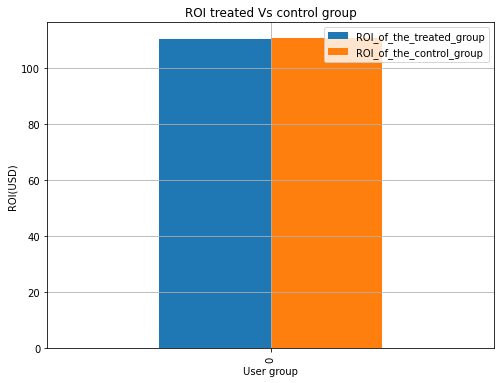

In [35]:
ROI=result[['ROI_of_the_treated_group','ROI_of_the_control_group']]
ROI.plot(y=['ROI_of_the_treated_group','ROI_of_the_control_group'],kind='bar', figsize=(8,6),grid=True)
plt.xlabel("User group")
plt.ylabel("ROI(USD)")
plt.title('ROI treated Vs control group')
plt.legend()
plt.show()